# Project
# [Project 1: Bitcoin Price Prediction - Group ID: 14]

Group Members:
  
Serkan Kütük

Mert Ziya

Kağan Kasapoğlu

Batuhan Şenşar

# Introduction
Bitcoin is a cryptocurrency based on blockchain technology. Blockchain is a decentralized and secure digital ledger that keeps track of all transactions made using  decentralized digital currencies. All owners maintain the same copy of the Bitcoin blockchain ledger. It is updated frequently  with  new cryptocurrency transactions. Like other cryptocurrencies, Bitcoin's blockchain network uses cryptocurrencies to keep all transactions secure.

 In our project, we would like to use a regression model to predict the closing price of Bitcoin. Use the BTCUSD.csv and coin_Dogecoin.csv datasets to achieve this goal. First of all, use  exploratory data analysis to draw statistical conclusions about the dataset. Then find and visualize the correlation between these two datasets.

# Utilized Datasets

The dataset “BTCUSD.csv” which contains 7 columns that are Open, High, Low, Close, Adj Close, Volume and date information in yy/mm/dd format. The columns of Open, High, Low, Close, Adj Close and Volume are of dtype float, while the date column contains values of dtype string which we will convert it into a datetime object. The dataset includes 2755 rows which will be our sample size. Additionally, we used another dataset called "coin_Dogecoin.csv" which includes 10 columns that are SNo, Name, Symbol, date (in yy/mm/dd format), open, high, low, close, Marketcap, volume information about the market values ranging from 20120103 to 20161230. The columns of open, high, low, close and volume are of dtype float, while the date column contains values of dtype string which we will convert it into a datetime object. The dataset contains 2760 rows, which are decremented by 5 to be included in the merged data frame.

First of all, we import the libraries we use in the project.

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from datetime import datetime, timedelta
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
%matplotlib inline


## The Main Dataset

We turn the main dataset into a data frame object, then inspect the features of the dataset.

In [ ]:
drive.mount("./drive", force_remount=True)

path_prefix = "./drive/My Drive"
fname = "BTC-USD.csv"

df = pd.read_csv(join(path_prefix, fname))
df

Mounted at ./drive


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2750,2022-03-29,47100.437500,48022.289063,47100.437500,47465.730469,47465.730469,31397059069
2751,2022-03-30,47456.898438,47655.148438,46746.210938,47062.664063,47062.664063,29333883962
2752,2022-03-31,47062.148438,47512.027344,45390.539063,45538.675781,45538.675781,33327427106
2753,2022-04-01,45554.164063,46616.242188,44403.140625,46281.644531,46281.644531,38162644287


In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
6,2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
7,2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700
8,2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400
9,2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800


In [ ]:
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
2745,2022-03-24,42886.652344,44131.855469,42726.164063,43960.933594,43960.933594,31042992291
2746,2022-03-25,43964.546875,44999.492188,43706.285156,44348.730469,44348.730469,30574413034
2747,2022-03-26,44349.859375,44735.996094,44166.273438,44500.828125,44500.828125,16950455995
2748,2022-03-27,44505.355469,46827.546875,44437.292969,46820.492188,46820.492188,28160889722
2749,2022-03-28,46821.851563,48086.835938,46690.203125,47128.003906,47128.003906,36362175703
2750,2022-03-29,47100.437500,48022.289063,47100.437500,47465.730469,47465.730469,31397059069
2751,2022-03-30,47456.898438,47655.148438,46746.210938,47062.664063,47062.664063,29333883962
2752,2022-03-31,47062.148438,47512.027344,45390.539063,45538.675781,45538.675781,33327427106
2753,2022-04-01,45554.164063,46616.242188,44403.140625,46281.644531,46281.644531,38162644287
2754,2022-04-02,46168.101563,47003.429688,46157.980469,46508.101563,46508.101563,35441143808


In [ ]:
print("\t\t\tThe statistical properties of the main dataset")
df.describe()

			The statistical properties of the main dataset


,Open,High,Low,Close,Adj Close,Volume
count,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2.755000e+03
mean,11768.664114,12082.896368,11425.227294,11783.725409,11783.725409,1.489443e+10
std,16405.233671,16841.443821,15910.212812,16413.271203,16413.271203,1.994140e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,609.777497,612.311005,606.981994,609.804504,609.804504,8.172330e+07
50%,6380.379883,6504.649902,6297.930176,6385.819824,6385.819824,5.262698e+09
75%,10795.780762,11047.681152,10485.476074,10788.915528,10788.915528,2.512467e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [ ]:
print("\tFeatures of columns\n\n")
df.info()

	Features of columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2755 non-null   object 
 1   Open       2755 non-null   float64
 2   High       2755 non-null   float64
 3   Low        2755 non-null   float64
 4   Close      2755 non-null   float64
 5   Adj Close  2755 non-null   float64
 6   Volume     2755 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 150.8+ KB


In [ ]:
df.shape

(2755, 7)

We check if there is any null value in the main dataset.

In [ ]:
df.isna().sum() # We have realized that there is no null value in the main dataset.

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Additional Dataset

In [ ]:
path_prefix = "./drive/My Drive"
fname = "coin_Dogecoin.csv"

df_doge = pd.read_csv(join(path_prefix, fname))
df_doge

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.000000e+00,1.509085e+06
1,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.000000e+00,2.169688e+06
2,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.000000e+00,3.188943e+06
3,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.000000e+00,1.115034e+07
4,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.000000e+00,7.284337e+06
...,...,...,...,...,...,...,...,...,...,...
2755,2756,Dogecoin,DOGE,2021-07-02 23:59:59,0.247997,0.238848,0.243982,0.245264,1.321471e+09,3.194925e+10
2756,2757,Dogecoin,DOGE,2021-07-03 23:59:59,0.250214,0.242454,0.245106,0.246411,9.170158e+08,3.210491e+10
2757,2758,Dogecoin,DOGE,2021-07-04 23:59:59,0.252567,0.243425,0.246425,0.246483,9.735115e+08,3.211767e+10
2758,2759,Dogecoin,DOGE,2021-07-05 23:59:59,0.246419,0.227838,0.246419,0.231614,1.267949e+09,3.018344e+10


In [ ]:
df_doge.head(10)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06
1,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06
2,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06
3,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07
4,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06
5,6,Dogecoin,DOGE,2013-12-21 23:59:59,0.000700,0.000354,0.000700,0.000394,0.0,4.360316e+06
6,7,Dogecoin,DOGE,2013-12-22 23:59:59,0.000498,0.000280,0.000391,0.000315,0.0,3.706592e+06
7,8,Dogecoin,DOGE,2013-12-23 23:59:59,0.000460,0.000294,0.000313,0.000451,0.0,5.644793e+06
8,9,Dogecoin,DOGE,2013-12-24 23:59:59,0.000913,0.000450,0.000450,0.000686,0.0,9.075938e+06
9,10,Dogecoin,DOGE,2013-12-25 23:59:59,0.000694,0.000558,0.000686,0.000587,0.0,8.194483e+06


In [ ]:
df_doge.tail(10)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2750,2751,Dogecoin,DOGE,2021-06-27 23:59:59,0.266891,0.240894,0.246045,0.264450,2.167522e+09,3.443160e+10
2751,2752,Dogecoin,DOGE,2021-06-28 23:59:59,0.266982,0.250762,0.264918,0.256857,1.932995e+09,3.344650e+10
2752,2753,Dogecoin,DOGE,2021-06-29 23:59:59,0.274940,0.252988,0.257061,0.262769,2.192563e+09,3.422149e+10
2753,2754,Dogecoin,DOGE,2021-06-30 23:59:59,0.263538,0.238268,0.263417,0.254215,2.047764e+09,3.311104e+10
2754,2755,Dogecoin,DOGE,2021-07-01 23:59:59,0.260092,0.238677,0.253828,0.244549,2.463947e+09,3.185285e+10
2755,2756,Dogecoin,DOGE,2021-07-02 23:59:59,0.247997,0.238848,0.243982,0.245264,1.321471e+09,3.194925e+10
2756,2757,Dogecoin,DOGE,2021-07-03 23:59:59,0.250214,0.242454,0.245106,0.246411,9.170158e+08,3.210491e+10
2757,2758,Dogecoin,DOGE,2021-07-04 23:59:59,0.252567,0.243425,0.246425,0.246483,9.735115e+08,3.211767e+10
2758,2759,Dogecoin,DOGE,2021-07-05 23:59:59,0.246419,0.227838,0.246419,0.231614,1.267949e+09,3.018344e+10
2759,2760,Dogecoin,DOGE,2021-07-06 23:59:59,0.241910,0.229842,0.231216,0.234422,1.265920e+09,3.055252e+10


In [ ]:
print("\t\t\tThe statistical properties of the additional dataset")
df_doge.describe()

			The statistical properties of the additional dataset


,SNo,High,Low,Open,Close,Volume,Marketcap
count,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2.760000e+03,2.760000e+03
mean,1380.500000,0.014964,0.012402,0.013669,0.013763,4.326321e+08,1.760533e+09
std,796.887696,0.069103,0.055536,0.062347,0.062559,2.807320e+09,8.115186e+09
min,1.000000,0.000089,0.000085,0.000087,0.000087,0.000000e+00,1.509085e+06
25%,690.750000,0.000231,0.000222,0.000227,0.000226,2.536138e+05,2.337892e+07
50%,1380.500000,0.001914,0.001772,0.001849,0.001844,5.582480e+06,2.135789e+08
75%,2070.250000,0.002986,0.002796,0.002900,0.002899,5.098244e+07,3.488812e+08
max,2760.000000,0.737567,0.608168,0.687801,0.684777,6.941068e+10,8.868082e+10


In [ ]:
print("\tFeatures of columns\n\n")
df_doge.info()

	Features of columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2760 non-null   int64  
 1   Name       2760 non-null   object 
 2   Symbol     2760 non-null   object 
 3   Date       2760 non-null   object 
 4   High       2760 non-null   float64
 5   Low        2760 non-null   float64
 6   Open       2760 non-null   float64
 7   Close      2760 non-null   float64
 8   Volume     2760 non-null   float64
 9   Marketcap  2760 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 215.8+ KB


In [ ]:
df_doge.shape

(2760, 10)

We check if there is any null value in the additional dataset.

In [ ]:
df_doge.isna().sum() # We have realized that there is no null value in the additional dataset.

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

# Exploratory Data Analysis

## Editing the datasets

While looking at the main dataset, we have realized that "Close" and "Adj Close" look quite similar. Therefore we check if they are just similar or the same.

Note: They are the same. Therefore we discarded "Adj Close".

In [ ]:
def check_similarity(df, first, second):
   if df[first].corr(df[second]) != 1:
     return False
   else:
     return True

if(check_similarity(df, "Close", "Adj Close")):
  print("\"Close\" and \"Adj Close\" are completely the same.\n")
  df.drop(["Adj Close"], axis=1, inplace = True)
  print("We deleted \"Adj Close\" in the main dataset because they are the same.\n")
  print("\t\t  This is the edited data frame of the main dataset\n")
else:
  print("\"Close\" and \"Adj Close\" are completely different than each other.")
df

"Close" and "Adj Close" are completely the same.

We deleted "Adj Close" in the main dataset because they are the same.

		  This is the edited data frame of the main dataset



,Date,Open,High,Low,Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...,...
2750,2022-03-29,47100.437500,48022.289063,47100.437500,47465.730469,31397059069
2751,2022-03-30,47456.898438,47655.148438,46746.210938,47062.664063,29333883962
2752,2022-03-31,47062.148438,47512.027344,45390.539063,45538.675781,33327427106
2753,2022-04-01,45554.164063,46616.242188,44403.140625,46281.644531,38162644287


In the additional dataset, we do not want to use these features: "SNo", "Name", "Symbol", and "Marketcap".

Therefore we extract these features from the additional dataset.

In [ ]:
df_doge.drop(["SNo", "Name", "Symbol", "Marketcap"], axis=1, inplace = True)
print("\t   This is the edited data frame of the additional dataset\n")
df_doge

	   This is the edited data frame of the additional dataset



,Date,High,Low,Open,Close,Volume
0,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.000000e+00
1,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.000000e+00
2,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.000000e+00
3,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.000000e+00
4,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.000000e+00
...,...,...,...,...,...,...
2755,2021-07-02 23:59:59,0.247997,0.238848,0.243982,0.245264,1.321471e+09
2756,2021-07-03 23:59:59,0.250214,0.242454,0.245106,0.246411,9.170158e+08
2757,2021-07-04 23:59:59,0.252567,0.243425,0.246425,0.246483,9.735115e+08
2758,2021-07-05 23:59:59,0.246419,0.227838,0.246419,0.231614,1.267949e+09


The names of columns in the main dataset and in the additional dataset are the same; which is quite confusing. Therefore we change the column names in the additional dataset.

In [ ]:
df_doge.rename(columns = {'High':'doge_high', 'Low':'doge_low', 'Open':'doge_open', 'Close':'doge_close', "Volume": "doge_volume"}, inplace = True)
print("\t   This is the edited data frame of the additional dataset\n")
df_doge

	   This is the edited data frame of the additional dataset



,Date,doge_high,doge_low,doge_open,doge_close,doge_volume
0,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.000000e+00
1,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.000000e+00
2,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.000000e+00
3,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.000000e+00
4,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.000000e+00
...,...,...,...,...,...,...
2755,2021-07-02 23:59:59,0.247997,0.238848,0.243982,0.245264,1.321471e+09
2756,2021-07-03 23:59:59,0.250214,0.242454,0.245106,0.246411,9.170158e+08
2757,2021-07-04 23:59:59,0.252567,0.243425,0.246425,0.246483,9.735115e+08
2758,2021-07-05 23:59:59,0.246419,0.227838,0.246419,0.231614,1.267949e+09


In the main dataset, "Date" is in this format; "year - month - day 00: 00: 00"

In the additional dataset, "Date" is in this format; "year - month - day 23:59:59"

This situation prevents us to merge these two datasets based on "Date".

Therefore, we add "1 second" to every "Date" object in the additional dataset.

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df_doge["Date"] = pd.to_datetime(df_doge["Date"])

def add_second(Date):
    return Date + timedelta(seconds = 1)
df_doge["Date"] = df_doge["Date"]. apply(add_second)
print("\t   This is the edited data frame of the additional dataset\n")
df_doge

	   This is the edited data frame of the additional dataset



,Date,doge_high,doge_low,doge_open,doge_close,doge_volume
0,2013-12-17,0.000866,0.000150,0.000299,0.000205,0.000000e+00
1,2013-12-18,0.000289,0.000116,0.000207,0.000269,0.000000e+00
2,2013-12-19,0.000362,0.000205,0.000267,0.000362,0.000000e+00
3,2013-12-20,0.001520,0.000328,0.000395,0.001162,0.000000e+00
4,2013-12-21,0.001143,0.000662,0.001143,0.000704,0.000000e+00
...,...,...,...,...,...,...
2755,2021-07-03,0.247997,0.238848,0.243982,0.245264,1.321471e+09
2756,2021-07-04,0.250214,0.242454,0.245106,0.246411,9.170158e+08
2757,2021-07-05,0.252567,0.243425,0.246425,0.246483,9.735115e+08
2758,2021-07-06,0.246419,0.227838,0.246419,0.231614,1.267949e+09


Finally, we create a new dataframe "merged" that is the union of the main and the additional dataset.

We also set it's index to "Date". (It will ease our applications on the dataset later on.)

In [ ]:
merged= pd.merge(df, df_doge, on='Date')
merged = merged.set_index("Date")
merged

,Open,High,Low,Close,Volume,doge_high,doge_low,doge_open,doge_close,doge_volume
Date,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.000329,0.000291,0.000326,0.000294,1.321120e+06
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.000299,0.000260,0.000293,0.000268,1.463600e+06
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.000325,0.000267,0.000268,0.000298,2.215910e+06
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.000307,0.000275,0.000298,0.000277,8.835630e+05
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.000310,0.000267,0.000276,0.000292,9.930040e+05
...,...,...,...,...,...,...,...,...,...,...
2021-07-03,33854.421875,34909.261719,33402.695313,34668.546875,24383958643,0.247997,0.238848,0.243982,0.245264,1.321471e+09
2021-07-04,34665.566406,35937.566406,34396.476563,35287.781250,24924307911,0.250214,0.242454,0.245106,0.246411,9.170158e+08
2021-07-05,35284.343750,35284.343750,33213.660156,33746.003906,26721554282,0.252567,0.243425,0.246425,0.246483,9.735115e+08


## Visualization price trends based on time series and volume

The first one is for bitcoin.

The second one is for dogecoin.

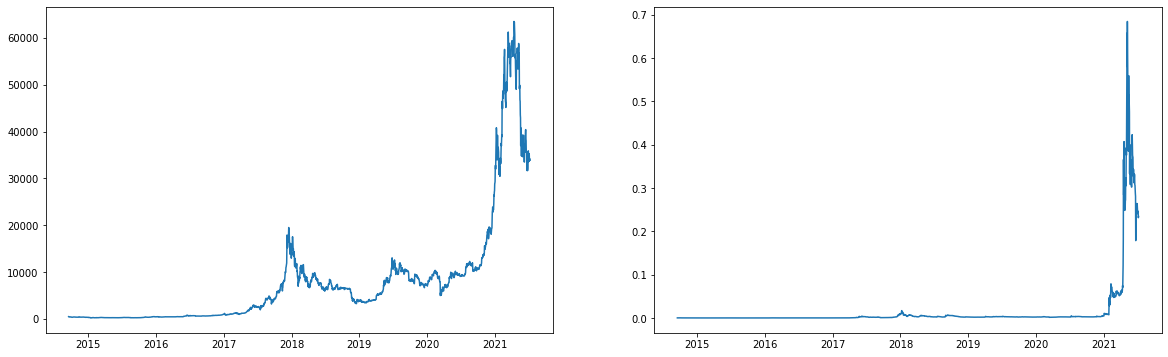

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(20, 6))

axs[0].plot(merged["Close"])
axs[1].plot(merged["doge_close"])

## Visualization each feature separately based on time series

**Visualization of each feature separately based on time series for bitcoin**

The first time series is for the open price of bitcoin.

The second time series is for the high prices of bitcoin.

The third time series is for the low prices of bitcoin.


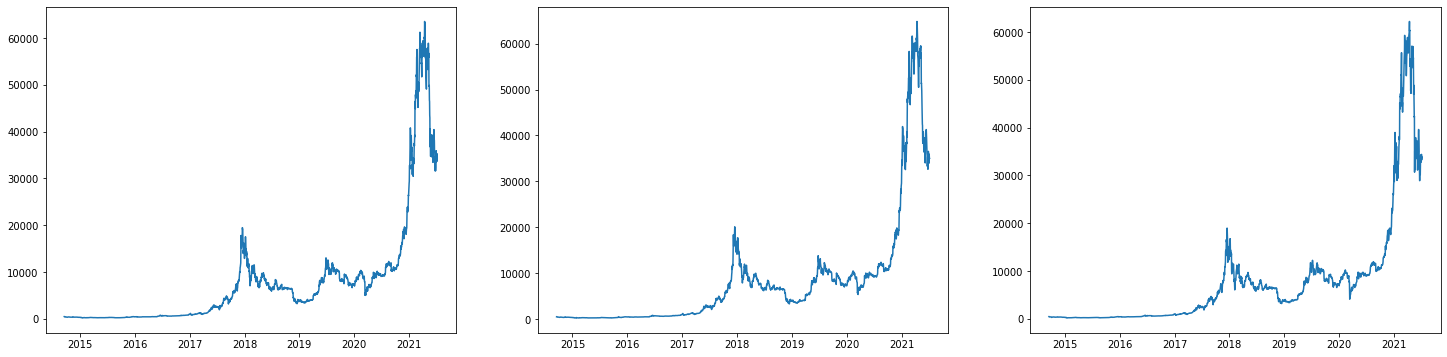

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(25, 6))
# for bitcoin
axs[0].plot(merged["Open"])
axs[1].plot(merged["High"])
axs[2].plot(merged["Low"])

**Visualization of each feature separately based on time series for dogecoin**

The first time series is for the open price of dogecoin.

The second time series is for the high prices of dogecoin.

The third time series is for the low prices of dogecoin.


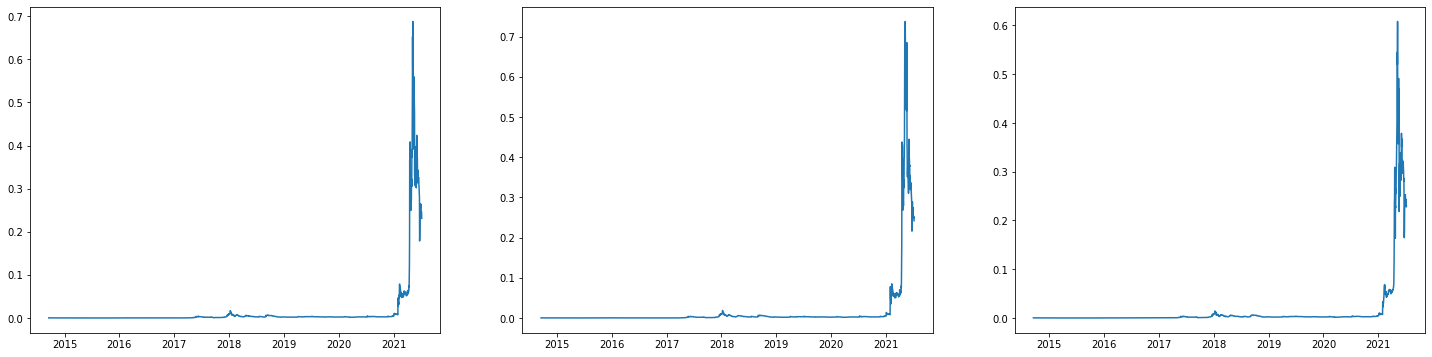

In [ ]:
# for doge
fig, axs = plt.subplots(1,3, figsize=(25, 6))
# for bitcoin
axs[0].plot(merged["doge_open"])
axs[1].plot(merged["doge_high"])
axs[2].plot(merged["doge_low"])

In [ ]:
df_close_volume = df.copy()
df_close_volume.drop(["Open", "Date", "High", "Low"], axis=1, inplace = True)
df_close_volume = df_close_volume.set_index("Volume")
df_close_volume

,Close
Volume,
21056800,457.334015
34483200,424.440002
37919700,394.795990
36863600,408.903992
26580100,398.821014
...,...
31397059069,47465.730469
29333883962,47062.664063
33327427106,45538.675781


## Analysis of the highest and lowest price of all time with respect to volume


In [ ]:
analysis = df.copy()
analysis.drop(["Open", "Date", "Close"], axis=1, inplace = True)
print("The highest price of all time is ", max(analysis["High"]))
print("The lowest price of all time is ", min(analysis["Low"]))

The highest price of all time is  68789.625
The lowest price of all time is  171.509995


In [ ]:
analysis.loc[analysis["Low"] == 171.509995]

,High,Low,Volume
119,223.893997,171.509995,97638704


In [ ]:
analysis.loc[analysis["High"] == 68789.625]

,High,Low,Volume
2611,68789.625,63208.113281,48730828378


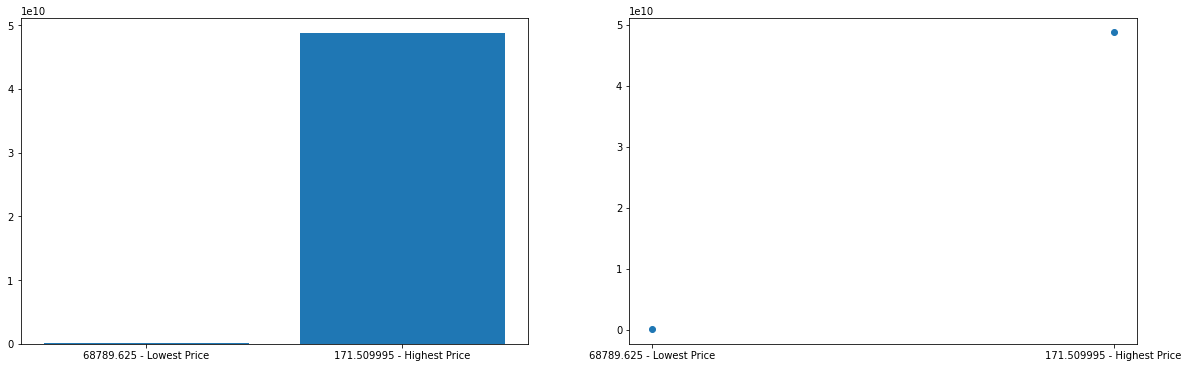

In [ ]:
data = {"68789.625 - Lowest Price": 97638704, "171.509995 - Highest Price": 48730828378}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1,2, figsize=(20, 6))
axs[0].bar(names, values)
axs[1].scatter(names, values)

As can be seen, there is a positive correlation between the price and volume. The highest price has a quite large volume, while the lowest price has a quite low volume.

## Analyzing how high & low prices change with respect to time


The first one is for the high prices change with respect to time.

The second one is for the low prices change with respect to time.

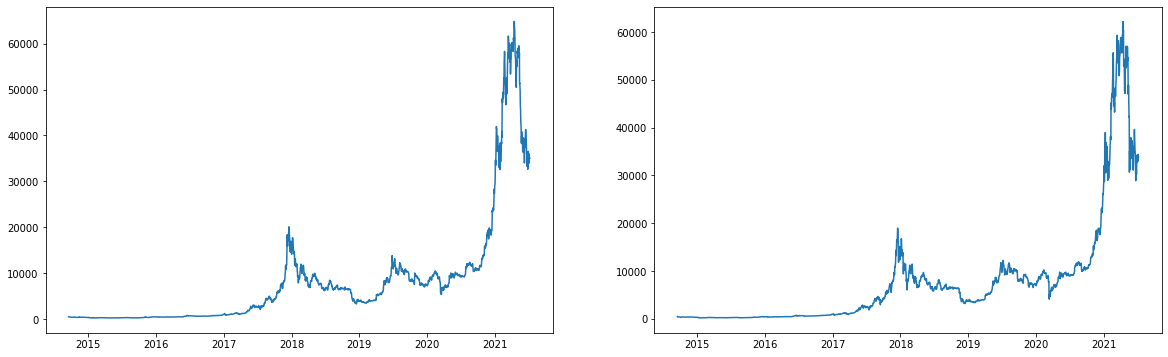

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(20, 6))

axs[0].plot(merged["High"])
axs[1].plot(merged["Low"])

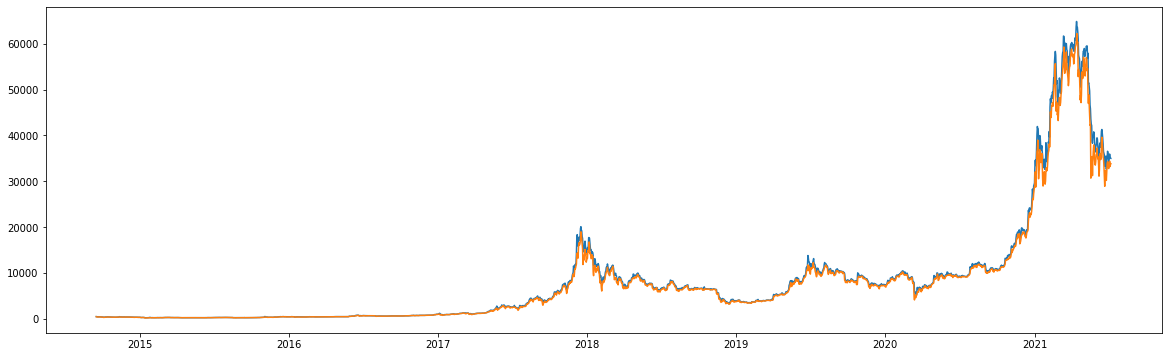

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(20, 6))

axs.plot(merged["High"])
axs.plot(merged["Low"])

By looking at this data, it is possible to say that low and high prices increase by time.

## Comparison of open, close, high and low prices for 2017 and 2018

In [ ]:
def assign_year(date):
    if  date.year == 2014:
        return 2014
    elif date.year == 2015:
        return 2015
    elif date.year == 2016:
        return 2016
    elif date.year == 2017:
        return 2017
    elif date.year == 2018:
        return 2018
    elif date.year == 2019:
        return 2019
    elif date.year == 2020:
        return 2020
    else:
        return 2021
df["Year"] = df["Date"].apply(assign_year)
df

,Date,Open,High,Low,Close,Volume,Year
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014
...,...,...,...,...,...,...,...
2750,2022-03-29,47100.437500,48022.289063,47100.437500,47465.730469,31397059069,2021
2751,2022-03-30,47456.898438,47655.148438,46746.210938,47062.664063,29333883962,2021
2752,2022-03-31,47062.148438,47512.027344,45390.539063,45538.675781,33327427106,2021
2753,2022-04-01,45554.164063,46616.242188,44403.140625,46281.644531,38162644287,2021


In [ ]:
df.groupby(by=["Year"]).mean()

,Open,High,Low,Close,Volume
Year,,,,,
2014,365.058217,373.265397,355.903726,363.693085,2.383690e+07
2015,272.149011,278.151978,266.807891,272.453381,3.390557e+07
2016,567.141429,574.302273,560.453374,568.492407,8.592451e+07
2017,3970.644848,4144.687445,3811.707792,4006.033629,2.382867e+09
2018,7601.018680,7787.978969,7350.747939,7572.298947,6.063552e+09
2019,7385.218456,7549.907409,7222.602868,7395.246282,1.673049e+10
2020,11056.787201,11304.359035,10844.595163,11116.378092,3.302327e+10
2021,46194.790529,47458.552307,44762.792926,46223.517865,4.313284e+10


### 2017

In [ ]:
data_2017 = df[837:1202]
data_2017.drop(["Year"], axis=1, inplace = True)
data_2017.drop(["Volume", "Date"], axis=1, inplace = True)
data_2017.reset_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


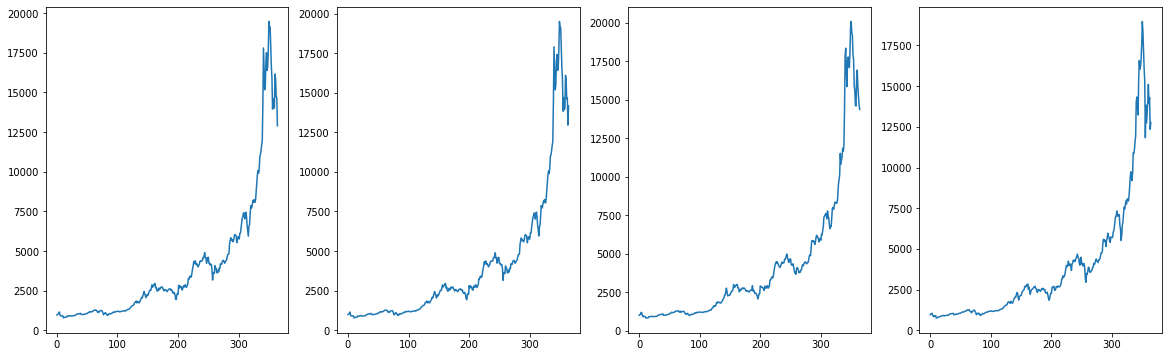

In [ ]:
fig, axs = plt.subplots(1,4, figsize=(20, 6))

axs[0].plot(data_2017["Open"])
axs[1].plot(data_2017["Close"])
axs[2].plot(data_2017["High"])
axs[3].plot(data_2017["Low"])

### 2018

In [ ]:
data_2018 = df[1202:1567]
data_2018.drop(["Year"], axis=1, inplace = True)
data_2018.drop(["Volume", "Date"], axis=1, inplace = True)
data_2018.reset_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


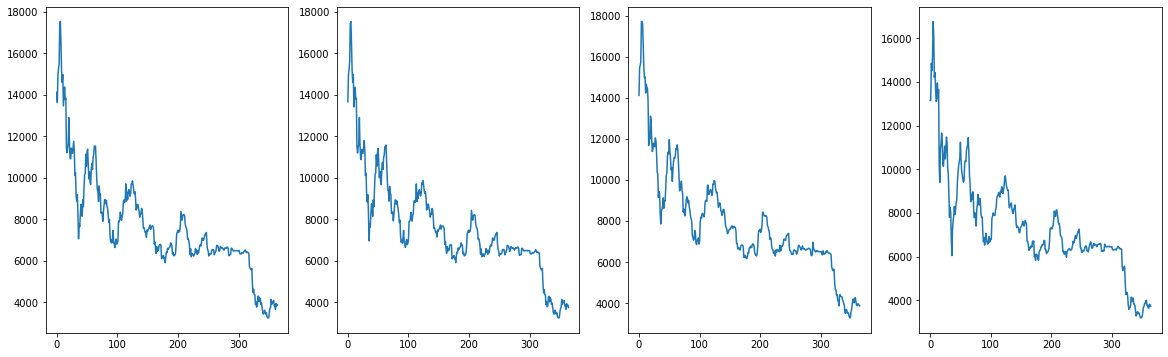

In [ ]:
fig, axs = plt.subplots(1,4, figsize=(20, 6))

axs[0].plot(data_2018["Open"])
axs[1].plot(data_2018["Close"])
axs[2].plot(data_2018["High"])
axs[3].plot(data_2018["Low"])

### Comparasion

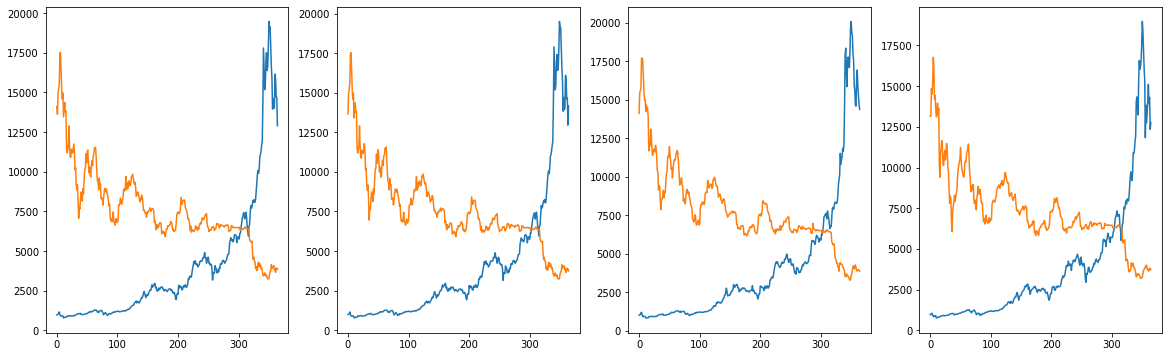

In [ ]:
fig, axs = plt.subplots(1,4, figsize=(20, 6))

axs[0].plot(data_2017["Open"])
axs[1].plot(data_2017["Close"])
axs[2].plot(data_2017["High"])
axs[3].plot(data_2017["Low"])

axs[0].plot(data_2018["Open"])
axs[1].plot(data_2018["Close"])
axs[2].plot(data_2018["High"])
axs[3].plot(data_2018["Low"])

<BarContainer object of 2 artists>

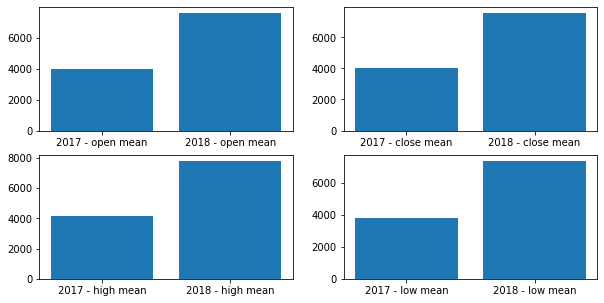

In [ ]:
data = {"2017 - open mean": data_2017["Open"].mean(), "2018 - open mean": data_2018["Open"].mean()}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(2,2, figsize=(10, 5), sharex = False, sharey = False)
axs[0][0].bar(names, values)

data = {"2017 - close mean": data_2017["Close"].mean(), "2018 - close mean": data_2018["Close"].mean()}
names = list(data.keys())
values = list(data.values())
axs[0][1].bar(names, values)

data = {"2017 - high mean": data_2017["High"].mean(), "2018 - high mean": data_2018["High"].mean()}
names = list(data.keys())
values = list(data.values())
axs[1][0].bar(names, values)

data = {"2017 - low mean": data_2017["Low"].mean(), "2018 - low mean": data_2018["Low"].mean()}
names = list(data.keys())
values = list(data.values())
axs[1][1].bar(names, values)

# Statistical Testing

                  Open       Close    Volume  next_day_open
Date                                                       
2014-09-17  465.864014  457.334015  21056800     456.859985
2014-09-18  456.859985  424.440002  34483200     424.102997
2014-09-19  424.102997  394.795990  37919700     394.673004
2014-09-20  394.673004  408.903992  36863600     408.084991
2014-09-21  408.084991  398.821014  26580100     399.100006


Pearson correlation coefficient between close price and open price of the next day is:  0.9999976196795548
P value:  0.0
P value is so much smaller than 0.05 so we can safely say that the close price and open price of the next day are probably correlated
Spearman correlation coefficient between close price and open price of the next day is:  0.999996593448702
P value:  0.0
P value is so much smaller than 0.05 so we can safely say that the lose price and open price of the next day are probably correlated


[]

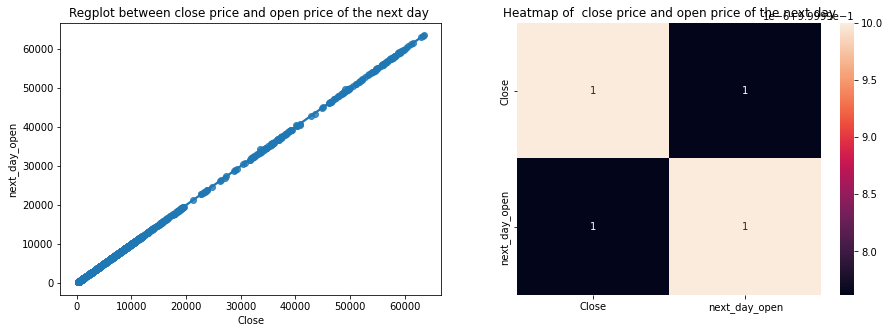

In [ ]:
# For Pearson's Correlation test
# H0: the close price of the bitcoin and open price of the next day are correlated.
# H1: the close price of the bitcoin and open price of the next day does not have any correlation.

next_day_corr=merged.merge(merged.shift(-1)[["Open"]].rename(columns={"Open":"next_day_open"}),on="Date",how="left")[["Open","Close","Volume","next_day_open"]]
next_day_corr.drop(next_day_corr.tail(1).index,inplace=True)
print(next_day_corr.head())
print("\n")


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))



coeff, p = pearsonr(next_day_corr.Close, next_day_corr.next_day_open)
print("Pearson correlation coefficient between close price and open price of the next day is: ",coeff)
print("P value: ",p)
print("P value is so much smaller than 0.05 so we can safely say that the close price and open price of the next day are probably correlated")


# For Spearman's Correlation test

coeff, p = spearmanr(next_day_corr.Close, next_day_corr.next_day_open)
print("Spearman correlation coefficient between close price and open price of the next day is: ",coeff)
print("P value: ",p)
print("P value is so much smaller than 0.05 so we can safely say that the lose price and open price of the next day are probably correlated")


axes[0].set_title("Regplot between close price and open price of the next day ")
axes[1].set_title("Heatmap of  close price and open price of the next day")

sns.regplot(x="Close",y="next_day_open",data=next_day_corr,ax=axes[0])
sns.heatmap(next_day_corr[["Close","next_day_open"]].corr(),annot=True,ax=axes[1])

plt.plot()




                  Open       Close    Volume  next_day_open
Date                                                       
2014-09-17  465.864014  457.334015  21056800     456.859985
2014-09-18  456.859985  424.440002  34483200     424.102997
2014-09-19  424.102997  394.795990  37919700     394.673004
2014-09-20  394.673004  408.903992  36863600     408.084991
2014-09-21  408.084991  398.821014  26580100     399.100006


Pearson correlation coefficient between volume and open price of the next day is:  0.7940068413499348
P value:  0.0
P value is so much smaller than 0.05 so we can safely say that the volume and open price of the next day are probably correlated
Spearman correlation coefficient between volume and open price of the next day is:  0.9366647860053272
P value:  0.0
P value is so much smaller than 0.05 so we can safely say that the volume and open price of the next day are probably correlated


[]

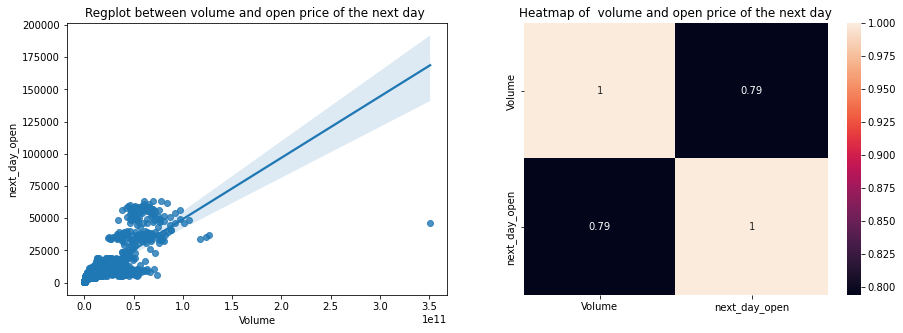

In [ ]:
# For Pearson's Correlation test
# H0: the volume of the bitcoin and open price of the next day are correlated.
# H1: the volume of the bitcoin and open price of the next day does not have any correlation.

print(next_day_corr.head())
print("\n")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))


coeff, p = pearsonr(next_day_corr.Volume, next_day_corr.next_day_open)
print("Pearson correlation coefficient between volume and open price of the next day is: ",coeff)
print("P value: ",p)
print("P value is so much smaller than 0.05 so we can safely say that the volume and open price of the next day are probably correlated")



coeff, p = spearmanr(next_day_corr.Volume, next_day_corr.next_day_open)
print("Spearman correlation coefficient between volume and open price of the next day is: ",coeff)
print("P value: ",p)
print("P value is so much smaller than 0.05 so we can safely say that the volume and open price of the next day are probably correlated")



axes[0].set_title("Regplot between volume and open price of the next day ")
axes[1].set_title("Heatmap of  volume and open price of the next day")

sns.regplot(x="Volume",y="next_day_open",data=next_day_corr,ax=axes[0])
sns.heatmap(next_day_corr[["Volume","next_day_open"]].corr(),annot=True,ax=axes[1])

plt.plot()




In [ ]:
#Statistical test to check  if significant differences in close price exist between different months of 2021

jan_data=merged[(merged.index>datetime(2021,1,1)) & (merged.index<datetime(2021,2,1))]
feb_data=merged[(merged.index>datetime(2021,2,1)) & (merged.index<datetime(2021,3,1))]
march_data=merged[(merged.index>datetime(2021,3,1)) & (merged.index<datetime(2021,4,1))]
jan_feb=jan_data.reset_index().merge(feb_data.reset_index(),left_index=True,right_index=True,suffixes=('_jan', '_feb'))[["Open_jan","Open_feb"]]
jan_march=jan_data.reset_index().merge(march_data.reset_index(),left_index=True,right_index=True,suffixes=('_jan', '_march'))[["Open_jan","Open_march"]]
feb_march=feb_data.reset_index().merge(march_data.reset_index(),left_index=True,right_index=True,suffixes=('_feb', '_march'))[["Open_feb","Open_march"]]

Pearson correlation coefficient between the close price of the bitcoin in jan and close price of the bitcoin in feb is:  0.13974041820088856
P value:  0.4869446363234026
P value is so much larger than 0.05 so we can not say that the close price of the bitcoin in jan and close price of the bitcoin in feb are not correlated
Spearman correlation coefficient between the close price of the bitcoin in jan and close price of the bitcoin in feb is:  0.07020757020757021
P value:  0.7278576283249971
P value is so much larger than 0.05 so we can not say that the close price of the bitcoin in jan and close price of the bitcoin in feb not correlated


[]

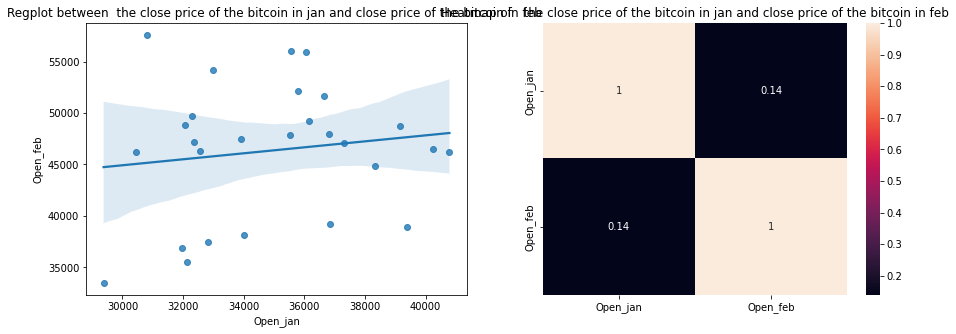

In [ ]:
# For Pearson's Correlation test
# H0: the close price of the bitcoin in jan and close price of the bitcoin in feb are correlated.
# H1: the close price of the bitcoin in jan and close price of the bitcoin in feb does not have any correlation.


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))



coeff, p = pearsonr(jan_feb.Open_jan, jan_feb.Open_feb)
print("Pearson correlation coefficient between the close price of the bitcoin in jan and close price of the bitcoin in feb is: ",coeff)
print("P value: ",p)
print("P value is so much larger than 0.05 so we can not say that the close price of the bitcoin in jan and close price of the bitcoin in feb are not correlated")


# For Spearman's Correlation test

coeff, p = spearmanr(jan_feb.Open_jan, jan_feb.Open_feb)
print("Spearman correlation coefficient between the close price of the bitcoin in jan and close price of the bitcoin in feb is: ",coeff)
print("P value: ",p)
print("P value is so much larger than 0.05 so we can not say that the close price of the bitcoin in jan and close price of the bitcoin in feb not correlated")


axes[0].set_title("Regplot between  the close price of the bitcoin in jan and close price of the bitcoin in feb ")
axes[1].set_title("Heatmap of   the close price of the bitcoin in jan and close price of the bitcoin in feb")

sns.regplot(x="Open_jan",y="Open_feb",data=jan_feb,ax=axes[0])
sns.heatmap(jan_feb[["Open_jan","Open_feb"]].corr(),annot=True,ax=axes[1])

plt.plot()

#Therefore there is no statistical significance between the close price of the bitcoin in jan and close price of the bitcoin in feb

Pearson correlation coefficient between the close price of the bitcoin in jan and close price of the bitcoin in march is:  0.2708968795238957
P value:  0.14763073317298184
P value is so much larger than 0.05 so we can not say that the close price of the bitcoin in jan and close price of the bitcoin in march are not correlated
Spearman correlation coefficient between the close price of the bitcoin in jan and close price of the bitcoin in march is:  0.32413793103448274
P value:  0.08055618262173106
P value is so much larger than 0.05 so we can not say that the close price of the bitcoin in jan and close price of the bitcoin in march are not correlated


[]

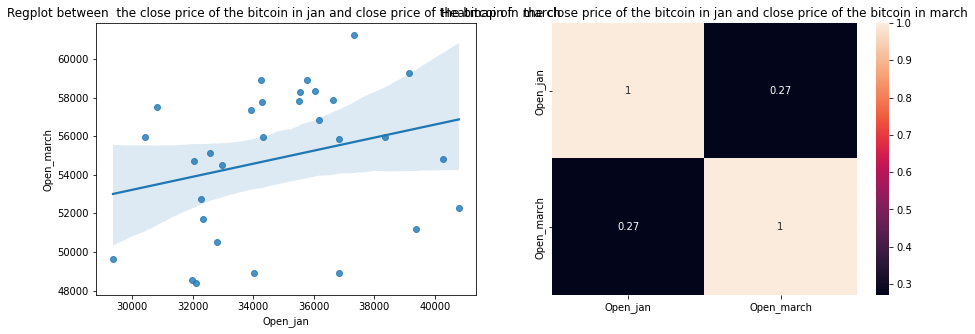

In [ ]:
# For Pearson's Correlation test
# H0: the close price of the bitcoin in jan and close price of the bitcoin in march are correlated.
# H1: the close price of the bitcoin in jan and close price of the bitcoin in march does not have any correlation.


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))



coeff, p = pearsonr(jan_march.Open_jan, jan_march.Open_march)
print("Pearson correlation coefficient between the close price of the bitcoin in jan and close price of the bitcoin in march is: ",coeff)
print("P value: ",p)
print("P value is so much larger than 0.05 so we can not say that the close price of the bitcoin in jan and close price of the bitcoin in march are not correlated")


# For Spearman's Correlation test

coeff, p = spearmanr(jan_march.Open_jan, jan_march.Open_march)
print("Spearman correlation coefficient between the close price of the bitcoin in jan and close price of the bitcoin in march is: ",coeff)
print("P value: ",p)
print("P value is so much larger than 0.05 so we can not say that the close price of the bitcoin in jan and close price of the bitcoin in march are not correlated")


axes[0].set_title("Regplot between  the close price of the bitcoin in jan and close price of the bitcoin in march ")
axes[1].set_title("Heatmap of   the close price of the bitcoin in jan and close price of the bitcoin in march")

sns.regplot(x="Open_jan",y="Open_march",data=jan_march,ax=axes[0])
sns.heatmap(jan_march[["Open_jan","Open_march"]].corr(),annot=True,ax=axes[1])

plt.plot()

#Therefore there is no statistical significance between the close price of the bitcoin in jan and close price of the bitcoin in march

## Checking if significant differences in close price exist between same months of 2020 and 2021


Pearson correlation coefficient between the open price of the bitcoin in jan 2021 and the open price of the bitcoin in jan 202 is:  0.11505814231696751
P value:  0.5448883761358051
P value is so much smaller than 0.05 so we can not say thatthe open price of the bitcoin in jan 2021 and the open price of the bitcoin in jan 2020 are  probably correlated
Spearman correlation coefficient between the open price of the bitcoin in jan 2021 and the open price of the bitcoin in jan 202 is:  0.0896551724137931
P value:  0.6375361975693831
P value is so much larger than 0.05 so we can not say thatthe open price of the bitcoin in jan 2021 and the open price of the bitcoin in jan 2020 are  probably correlated


[]

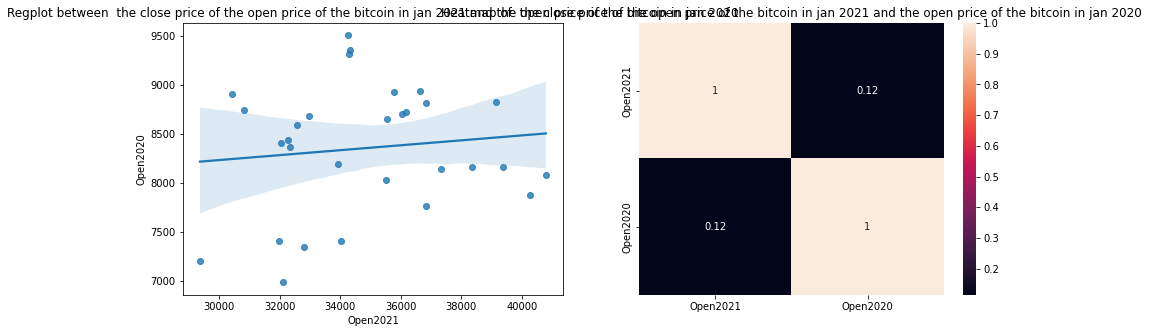

In [ ]:
jan_data_2020=merged[(merged.index>datetime(2020,1,1)) & (merged.index<datetime(2020,2,1))]
jan_2020_2021=jan_data.reset_index().merge(jan_data_2020.reset_index(),left_index=True,right_index=True,suffixes=('2021', '2020'))[["Open2021","Open2020"]]

# For Pearson's Correlation test
# H0: the open price of the bitcoin in jan 2021 and the open price of the bitcoin in jan 2020  are correlated.
# H1: the open price of the bitcoin in jan 2021 and the open price of the bitcoin in jan 2020 does not have any correlation.


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))



coeff, p = pearsonr(jan_2020_2021.Open2021, jan_2020_2021.Open2020)
print("Pearson correlation coefficient between the open price of the bitcoin in jan 2021 and the open price of the bitcoin in jan 202 is: ",coeff)
print("P value: ",p)
print("P value is so much smaller than 0.05 so we can not say thatthe open price of the bitcoin in jan 2021 and the open price of the bitcoin in jan 2020 are  probably correlated")


# For Spearman's Correlation test

coeff, p = spearmanr(jan_2020_2021.Open2021, jan_2020_2021.Open2020)
print("Spearman correlation coefficient between the open price of the bitcoin in jan 2021 and the open price of the bitcoin in jan 202 is: ",coeff)
print("P value: ",p)
print("P value is so much larger than 0.05 so we can not say thatthe open price of the bitcoin in jan 2021 and the open price of the bitcoin in jan 2020 are  probably correlated")


axes[0].set_title("Regplot between  the close price of the open price of the bitcoin in jan 2021 and the open price of the bitcoin in jan 2020")
axes[1].set_title("Heatmap of  the close price of the open price of the bitcoin in jan 2021 and the open price of the bitcoin in jan 2020")

sns.regplot(x="Open2021",y="Open2020",data=jan_2020_2021,ax=axes[0])
sns.heatmap(jan_2020_2021[["Open2021","Open2020"]].corr(),annot=True,ax=axes[1])

plt.plot()

#Therefore there is no statistical significance between the open price of the bitcoin in jan 2021 and the open price of the bitcoin in jan 2020

## Statistical test to check  whether there exist significant statistical differences between high and low prices with respect to open and close prices of the same day


Pearson correlation coefficient between the high price of the bitcoin and the open price of the bitcoin is:  0.9994065480554002
P value:  0.0
P value is so much smaller than 0.05 so we can  say that he high price of the bitcoin and the open price of the bitcoin  are  correlated
Spearman correlation coefficient between the high price of the bitcoin and the open price of the bitcoin is:  0.9994649246379889
P value:  0.0
P value is so much smaller than 0.05 so we can  say that he high price of the bitcoin and the open price of the bitcoin  are  correlated


[]

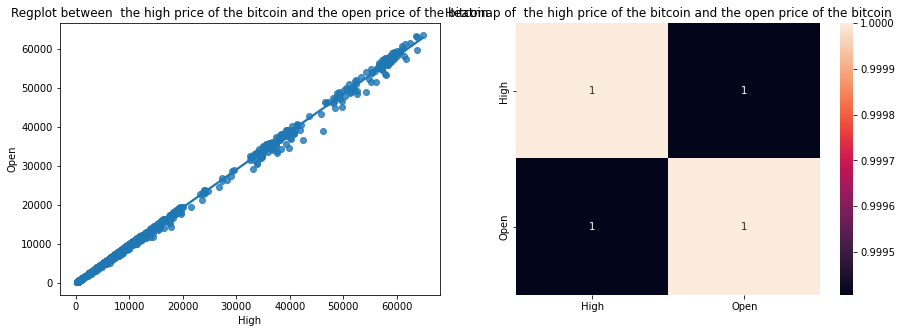

In [ ]:
#Statistical test to check  whether there exist significant statistical differences between high and low prices with respect to open and close prices of the same day

# For Pearson's Correlation test
# H0: the high price of the bitcoin and the open price of the bitcoin are correlated.
# H1: the high price of the bitcoin and the open price of the bitcoin are does not have any correlation.


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))



coeff, p = pearsonr(merged.High, merged.Open)
print("Pearson correlation coefficient between the high price of the bitcoin and the open price of the bitcoin is: ",coeff)
print("P value: ",p)
print("P value is so much smaller than 0.05 so we can  say that he high price of the bitcoin and the open price of the bitcoin  are  correlated")


# For Spearman's Correlation test

coeff, p = spearmanr(merged.High, merged.Open)
print("Spearman correlation coefficient between the high price of the bitcoin and the open price of the bitcoin is: ",coeff)
print("P value: ",p)
print("P value is so much smaller than 0.05 so we can  say that he high price of the bitcoin and the open price of the bitcoin  are  correlated")


axes[0].set_title("Regplot between  the high price of the bitcoin and the open price of the bitcoin")
axes[1].set_title("Heatmap of  the high price of the bitcoin and the open price of the bitcoin")

sns.regplot(x="High",y="Open",data=merged,ax=axes[0])
sns.heatmap(merged[["High","Open"]].corr(),annot=True,ax=axes[1])

plt.plot()

#Therefore there is a statistical significance between the high price of the bitcoin and the open price of the bitcoin

## Statistical test to check  whether there exist significant statistical differences between high and low prices with respect to open and close prices of the same day

Pearson correlation coefficient between the low price of the bitcoin and the close price of the bitcoin is:  0.999243331911978
P value:  0.0
P value is so much smaller than 0.05 so we can  say that he low price of the bitcoin and the close price of the bitcoin  are  correlated
Spearman correlation coefficient between the high price of the bitcoin and the open price of the bitcoin is:  0.9994949631737499
P value:  0.0
P value is so much smaller than 0.05 so we can  say that he low price of the bitcoin and the close price of the bitcoin  are  correlated


[]

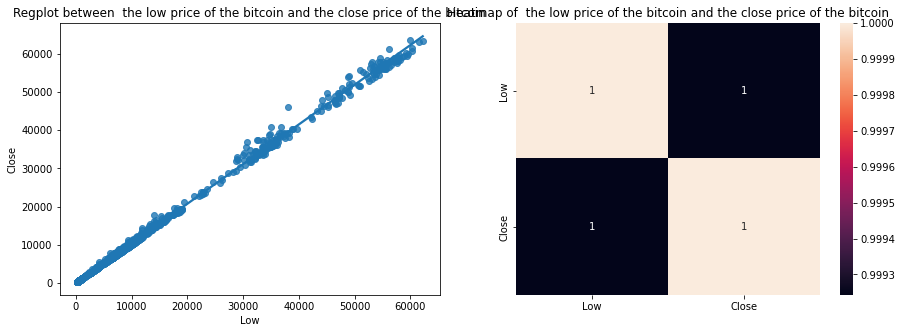

In [ ]:
# For Pearson's Correlation test
# H0: the low price of the bitcoin and the close price of the bitcoin are correlated.
# H1: the low price of the bitcoin and the close price of the bitcoin are does not have any correlation.


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))



coeff, p = pearsonr(merged.Low, merged.Close)
print("Pearson correlation coefficient between the low price of the bitcoin and the close price of the bitcoin is: ",coeff)
print("P value: ",p)
print("P value is so much smaller than 0.05 so we can  say that he low price of the bitcoin and the close price of the bitcoin  are  correlated")


# For Spearman's Correlation test

coeff, p = spearmanr(merged.Low, merged.Close)
print("Spearman correlation coefficient between the high price of the bitcoin and the open price of the bitcoin is: ",coeff)
print("P value: ",p)
print("P value is so much smaller than 0.05 so we can  say that he low price of the bitcoin and the close price of the bitcoin  are  correlated")


axes[0].set_title("Regplot between  the low price of the bitcoin and the close price of the bitcoin")
axes[1].set_title("Heatmap of  the low price of the bitcoin and the close price of the bitcoin")

sns.regplot(x="Low",y="Close",data=merged,ax=axes[0])
sns.heatmap(merged[["Low","Close"]].corr(),annot=True,ax=axes[1])

plt.plot()

#Therefore there is a statistical significance between the high price of the bitcoin and the open price of the bitcoin

Pearson correlation coefficient between volume and open price of the next day is:  0.7940068413499348
P value:  0.0
P value is so much smaller than 0.05 so we can safely say that the volume and open price of the next day are probably correlated
Spearman correlation coefficient between volume and open price of the next day is:  0.9366647860053272
P value:  0.0
P value is so much smaller than 0.05 so we can safely say that the volume and open price of the next day are probably correlated


[]

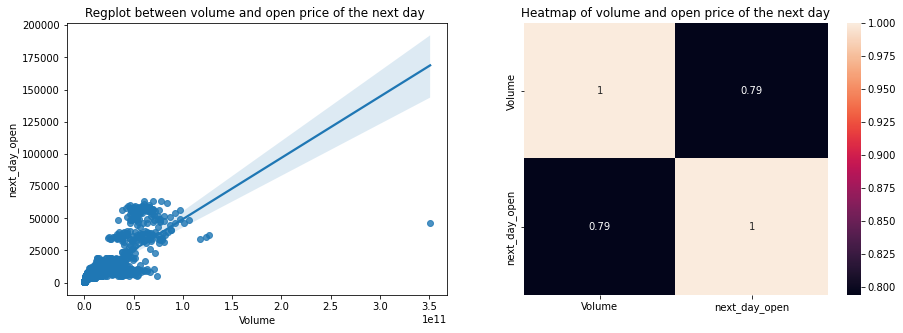

In [ ]:
# For Pearson's Correlation test
# H0: the volume of the bitcoin and open price of the next day are correlated.
# H1: the volume of the bitcoin and open price of the next day does not have any correlation.



fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))


coeff, p = pearsonr(next_day_corr.Volume, next_day_corr.next_day_open)
print("Pearson correlation coefficient between volume and open price of the next day is: ",coeff)
print("P value: ",p)
print("P value is so much smaller than 0.05 so we can safely say that the volume and open price of the next day are probably correlated")


# For Spearman's Correlation test

coeff, p = spearmanr(next_day_corr.Volume, next_day_corr.next_day_open)
print("Spearman correlation coefficient between volume and open price of the next day is: ",coeff)
print("P value: ",p)
print("P value is so much smaller than 0.05 so we can safely say that the volume and open price of the next day are probably correlated")


axes[0].set_title("Regplot between volume and open price of the next day ")
axes[1].set_title("Heatmap of volume and open price of the next day")

sns.regplot(x="Volume",y="next_day_open",data=next_day_corr,ax=axes[0])
sns.heatmap(next_day_corr[["Volume","next_day_open"]].corr(),annot=True,ax=axes[1])

plt.plot()


#Therefore there is a statistical significance between the high price of the bitcoin and the open price of the bitcoin

## Utilizing four new features using extra datasets in hypothesis testing

Pearson correlation coefficient between the bitcoin and the open price of the dogecoin is:  0.6414843085258214
P value:  2.630606740000707e-288
P value is so much smaller than 0.05 so we can  say that the bitcoin and the open price of the dogecoin are  correlated
Spearman correlation coefficient between the bitcoin and the open price of the dogecoin is:  0.90543941749292
P value:  0.0
P value is so much smaller than 0.05 so we can  say that the bitcoin and the open price of the dogecoin are  correlated


[]

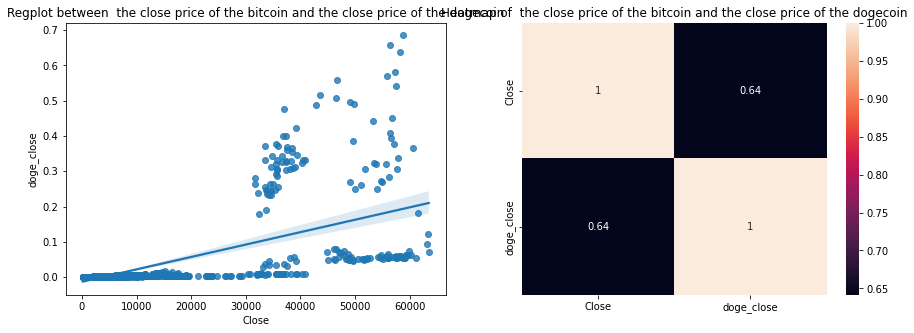

In [ ]:
# Our 4 features are doge_high, doge_low, dope_open, doge_close

# For Pearson's Correlation test
# H0: the open price of the bitcoin and the open price of the dogecoin are correlated.
# H1: the open price of the bitcoin and the open price of the dogecoin are does not have any correlation.


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))



coeff, p = pearsonr(merged.Close, merged.doge_close)
print("Pearson correlation coefficient between the bitcoin and the open price of the dogecoin is: ",coeff)
print("P value: ",p)
print("P value is so much smaller than 0.05 so we can  say that the bitcoin and the open price of the dogecoin are  correlated")


# For Spearman's Correlation test

coeff, p = spearmanr(merged.Close, merged.doge_close)
print("Spearman correlation coefficient between the bitcoin and the open price of the dogecoin is: ",coeff)
print("P value: ",p)
print("P value is so much smaller than 0.05 so we can  say that the bitcoin and the open price of the dogecoin are  correlated")


axes[0].set_title("Regplot between  the close price of the bitcoin and the close price of the dogecoin")
axes[1].set_title("Heatmap of  the close price of the bitcoin and the close price of the dogecoin")

sns.regplot(x="Close",y="doge_close",data=merged,ax=axes[0])
sns.heatmap(merged[["Close","doge_close"]].corr(),annot=True,ax=axes[1])

plt.plot()

#Therefore there is a statistical significance between the close price of the bitcoin and the close price of the dogecoin





## Statistical test to check  whether there exist significant statistical differences between high and low prices with respect to open and close prices of the same day

Pearson correlation coefficient between the high price of the dogecoin and the open price of the dogecoin is:  0.9922724310727845
P value:  0.0
P value is so much smaller than 0.05 so we can  say that he high price of the dogecoin and the open price of the dogecoin  are  correlated
Spearman correlation coefficient between the high price of the dogecoin and the open price of the dogecoin is:  0.9978509416334572
P value:  0.0
P value is so much smaller than 0.05 so we can  say that he high 


[]

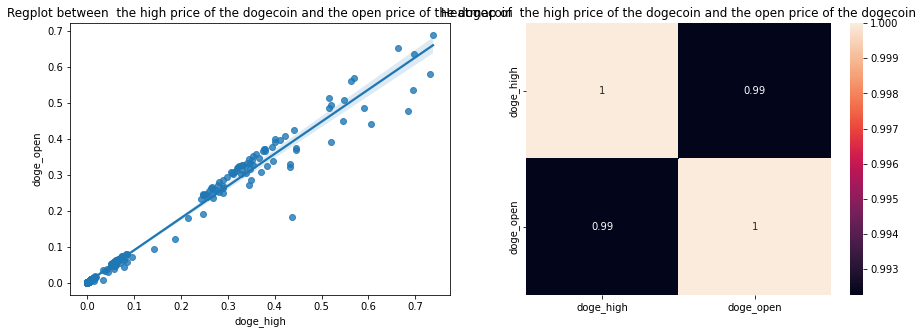

In [ ]:
# For Pearson's Correlation test
# H0: the high price of the dogecoin and the open price of the dogecoin are correlated.
# H1: the high price of the dogecoin and the open price of the dogecoin are does not have any correlation.


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))



coeff, p = pearsonr(merged.doge_high, merged.doge_open)
print("Pearson correlation coefficient between the high price of the dogecoin and the open price of the dogecoin is: ",coeff)
print("P value: ",p)
print("P value is so much smaller than 0.05 so we can  say that he high price of the dogecoin and the open price of the dogecoin  are  correlated")


# For Spearman's Correlation test



coeff, p = spearmanr(merged.doge_high, merged.doge_open)
print("Spearman correlation coefficient between the high price of the dogecoin and the open price of the dogecoin is: ",coeff)
print("P value: ",p)
print("P value is so much smaller than 0.05 so we can  say that he high ")

axes[0].set_title("Regplot between  the high price of the dogecoin and the open price of the dogecoin")
axes[1].set_title("Heatmap of  the high price of the dogecoin and the open price of the dogecoin")

sns.regplot(x="doge_high",y="doge_open",data=merged,ax=axes[0])
sns.heatmap(merged[["doge_high","doge_open"]].corr(),annot=True,ax=axes[1])

plt.plot()

#Therefore there is a statistical significance between the high price of the doge_high and the open price of the doge_high

# Machine Learning



In [ ]:


# We utilized  and feed out machine learning models with features called doge_high, doge_low, dope_open, doge_close.

#-	Prediction of opening price of 2021-07-07	 given all data of previous 30 days

X=merged[-31:-1].drop("Open",axis=1)
y=merged[-31:-1].Open

knn=KNeighborsRegressor()
knn.fit(X,y)
y_pred=knn.predict(merged[-1:].drop("Open",axis=1)),

print("Opening orice of 2021-07-07",merged[-1:].Open.max()," knn predicted ",y_pred[0][0])



dt = DecisionTreeRegressor()
dt.fit(X,y)
y_pred=dt.predict(merged[-1:].drop("Open",axis=1)),

print("Opening orice of 2021-07-07",merged[-1:].Open.max()," Decision tree predicted ",y_pred[0][0])


lr=LinearRegression()
lr.fit(X,y)
y_pred=lr.predict(merged[-1:].drop("Open",axis=1)),
print("Opening orice of 2021-07-07",merged[-1:].Open.max()," Linear regression predicted ",y_pred[0][0])



rf = RandomForestRegressor(n_estimators=50)
rf.fit(X,y)
y_pred=rf.predict(merged[-1:].drop("Open",axis=1)),
print("Opening orice of 2021-07-07",merged[-1:].Open.max()," Random Forest predicted ",y_pred[0][0])

Opening orice of 2021-07-07 34225.679688  knn predicted  34676.4734376
Opening orice of 2021-07-07 34225.679688  Decision tree predicted  33723.507813
Opening orice of 2021-07-07 34225.679688  Linear regression predicted  35036.4841829784
Opening orice of 2021-07-07 34225.679688  Random Forest predicted  34031.91914081997


In [ ]:
#Hyperparamater Tuning

random_forest_parameters = {
    'n_estimators':[10,15,20, 50, 100],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[2, 3, 5, 7,10],
}

grid_search_RF = GridSearchCV(estimator=rf,
                           param_grid=random_forest_parameters
)

grid_search_RF.fit(X,y)
y_pred=grid_search_RF.predict(merged[-1:].drop("Open",axis=1))
print("Opening price of 2021-07-07",merged[-1:].Open.max()," Tuned Random Forest predicted ",y_pred[0])

Opening price of 2021-07-07 34225.679688  Tuned Random Forest predicted  34461.098828300004


In [ ]:
knn_parameters = {'n_neighbors' : [3,5,7,9,10,12],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}

grid_search_knn = GridSearchCV(estimator=knn,
                           param_grid=knn_parameters
)

grid_search_knn.fit(X,y)
y_pred=grid_search_knn.predict(merged[-1:].drop("Open",axis=1))
print("Opening price of 2021-07-07",merged[-1:].Open.max()," Tuned kNN predicted ",y_pred[0])

Opening price of 2021-07-07 34225.679688  Tuned kNN predicted  35322.735243222225


In [ ]:
dt_parameters = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],

}

grid_search_dt = GridSearchCV(estimator=dt,
                           param_grid=dt_parameters
)

grid_search_dt.fit(X,y)
y_pred=grid_search_dt.predict(merged[-1:].drop("Open",axis=1))
print("Opening price of 2021-07-07",merged[-1:].Open.max()," Tuned decision tree predicted ",y_pred[0])

Opening price of 2021-07-07 34225.679688  Tuned decision tree predicted  34744.66601571428
